In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import folium
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# Crime Data Analysis and Machine Learning Modeling
This notebook demonstrates a complete analysis of the "Crime Data from 2020 to Present" dataset. The goal is to perform data cleaning, preprocessing, exploratory data analysis, and build machine learning models for classification and regression tasks.

**Objectives:**
- Classify the status of crime cases (solved/unsolved).
- Predict the victim's age based on other features in the dataset.

**Introduction:**

This project focuses on leveraging the "Crime Data from 2020 to Present" dataset provided by the Los Angeles Police Department (LAPD), accessible at Data.gov. The primary objective is to perform comprehensive data cleaning and preprocessing, followed by exploratory data analysis (EDA), and the development of machine learning models for both classification and regression tasks. The end goal is to achieve optimal predictive performance and extract meaningful insights that could aid in understanding crime patterns.

## Data Acquisition and Understanding
The dataset used for this project is sourced from [Data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present). It contains various features such as crime type, location, time, victim characteristics, and case status collected by LA police department. The dataset is in CSV format and consists of 990293 rows and 28 columns.


In [39]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                             BIKE - STOLEN  ...     IC   Invest Cont   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC   Invest Cont   
4                         THEFT OF IDENTITY  ...     IC   Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    510.0    998.0       NaN      NaN   
1    330.0    998.0       NaN      NaN   
2    480.0      NaN       NaN      NaN   
3    343.0      NaN       NaN      NaN   
4    354.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [40]:
df.shape

(990293, 28)

Data Description:
- **DR_NO**: A unique report number assigned to each incident for identification.
- **Date Rptd**: The date on which the incident was reported to law enforcement.
- **DATE OCC**: The date on which the incident occurred.
- **TIME OCC**: The time when the incident occurred, typically in 24-hour format.
- **AREA**: A numeric code representing the geographic area where the incident occurred.
- **AREA NAME**: The name of the geographic area corresponding to the AREA code.
- **Rpt Dist No**: A reporting district number indicating a smaller subdivision within an AREA.
- **Part 1-2**: Classification of the crime as either Part 1 (serious crimes) or Part 2 (less serious crimes) based on the Uniform Crime Reporting (UCR) program.
- **Crm Cd**: A numeric crime code identifying the specific type of crime committed.
- **Crm Cd Desc**: A textual description of the crime associated with the Crm Cd.
- **Mocodes**: Codes representing the modus operandi or methods used to commit the crime.
- **Vict Age**: The age of the victim involved in the incident.
- **Vict Sex**: The gender of the victim (e.g., M for male, F for female, X for non-binary/unknown).
- **Vict Descent**: The victim’s racial or ethnic descent, coded as abbreviations (e.g., H for Hispanic, W for White, B for Black).
- **Premis Cd**: A numeric code representing the type of premises where the crime occurred.
- **Premis Desc**: A textual description of the premises associated with the Premis Cd (e.g., Residence, Street).
- **Weapon Used Cd**: A numeric code representing the type of weapon used in the incident.
- **Weapon Desc**: A textual description of the weapon corresponding to the Weapon Used Cd (e.g., Firearm, Knife).
- **Status**: A code indicating the current status of the case (e.g., A for Active, C for Cleared).
- **Status Desc**: A textual description of the case status (e.g., Solved, Unsolved).
- **Crm Cd 1**, **Crm Cd 2**, **Crm Cd 3**, **Crm Cd 4**: Additional crime codes for cases involving multiple crimes or charges.
- **LOCATION**: The latitude and longitude coordinates representing the geographic location of the incident.
- **Cross Street**: The nearest cross street to the incident location, if available.
- **LAT**: The latitude of the incident location.
- **LON**: The longitude of the incident location.


### Missing Values Analysis
The initial analysis of the dataset revealed missing values in several columns. The table below summarizes the count of `NaN` values per column:


In [41]:
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           147652
Vict Age               0
Vict Sex          140778
Vict Descent      140789
Premis Cd            323
Premis Desc          894
Weapon Used Cd    663746
Weapon Desc       663746
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          921336
Crm Cd 3          987982
Crm Cd 4          990229
LOCATION               0
Cross Street      837652
LAT                    0
LON                    0
dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990293 entries, 0 to 990292
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           990293 non-null  int64  
 1   Date Rptd       990293 non-null  object 
 2   DATE OCC        990293 non-null  object 
 3   TIME OCC        990293 non-null  int64  
 4   AREA            990293 non-null  int64  
 5   AREA NAME       990293 non-null  object 
 6   Rpt Dist No     990293 non-null  int64  
 7   Part 1-2        990293 non-null  int64  
 8   Crm Cd          990293 non-null  int64  
 9   Crm Cd Desc     990293 non-null  object 
 10  Mocodes         842641 non-null  object 
 11  Vict Age        990293 non-null  int64  
 12  Vict Sex        849515 non-null  object 
 13  Vict Descent    849504 non-null  object 
 14  Premis Cd       989970 non-null  float64
 15  Premis Desc     989399 non-null  object 
 16  Weapon Used Cd  326547 non-null  float64
 17  Weapon Des

#### Next Steps:
1. Columns with low missing values (e.g., `Premis Cd`, `Premis Desc`, `Crm Cd 1`) can be imputed or dropped depending on relevance.
2. Columns with significant missing values (e.g., `Mocodes`, `Vict Sex`, `Weapon Used Cd`, `Cross Street`) need careful handling:
   - Imputing with default values (e.g., "Unknown").
3. Columns like `Crm Cd 2`, `Crm Cd 3`, and `Crm Cd 4` have high missingness and might be dropped unless they serve a crucial purpose.
4. Many columns have a wrong datatype (e.g., `DATE OCC`, `TIME OCC`) and need to be converted to the appropriate format.

### Data Visualization and Exploratory Data Analysis (EDA)

### Proportion of Crimes by Victim Sex
This pie chart provides a visual representation of the distribution of crime incidents based on the sex of the victim. The chart is divided into the following categories:

- Male: Comprises the majority of victims, accounting for 47% of the total incidents.
- Female: Represents 41.7% of the victims, indicating a near-equal distribution between male and female victims.
- Unknown: A small proportion, 11.3%, corresponds to cases where the victim's sex is unspecified or unknown.

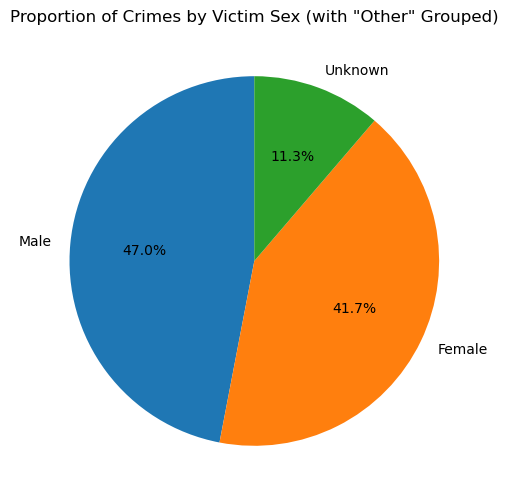

In [5]:
# Group small categories into "Other"
crime_by_sex = df['Vict Sex'].value_counts()
grouped_crime_by_sex = crime_by_sex.copy()

# Define a threshold for grouping small categories
threshold = 0.01 * crime_by_sex.sum()  # Categories with less than 1% of total crimes will be grouped

# Group categories smaller than the threshold
grouped_crime_by_sex['Other'] = grouped_crime_by_sex[grouped_crime_by_sex < threshold].sum()
grouped_crime_by_sex = grouped_crime_by_sex[grouped_crime_by_sex >= threshold]

# Prepare labels
labels = {'M': 'Male', 'F': 'Female', 'X': 'Unknown', 'Other': 'Other'}
plt.figure(figsize=(10, 6))

# Create pie chart
plt.pie(
    grouped_crime_by_sex, 
    labels=[labels.get(x, 'Unknown') for x in grouped_crime_by_sex.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Proportion of Crimes by Victim Sex (with "Other" Grouped)')
plt.show()


#### Key Insights:
- The data shows a nearly balanced distribution between male and female victims, with a slight predominance of male victims.
- The "Unknown" category is not big, suggesting that most incidents include information on the victim's sex.

### Number of Crimes Per Year

This bar chart illustrates the total number of reported crimes per year from 2020 to 2024. The data reveals the following trends:

- **2020:** Approximately 200,000 crimes were reported.
- **2021:** A similar crime count to 2020, indicating a consistent trend.
- **2022:** The highest number of crimes reported in the dataset, exceeding the totals from previous years.
- **2023:** A slight decline in crime numbers compared to 2022.
- **2024:** A significant drop in reported crimes, likely due to incomplete data collection for the current year.

/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469/4179959407.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469/4179959407.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


Total number of crimes: 990293

Crimes per year:
 year
2020    199806
2021    209831
2022    235189
2023    232216
2024    113251
Name: count, dtype: int64

Percent increase from 2020 to 2023: 16.22%


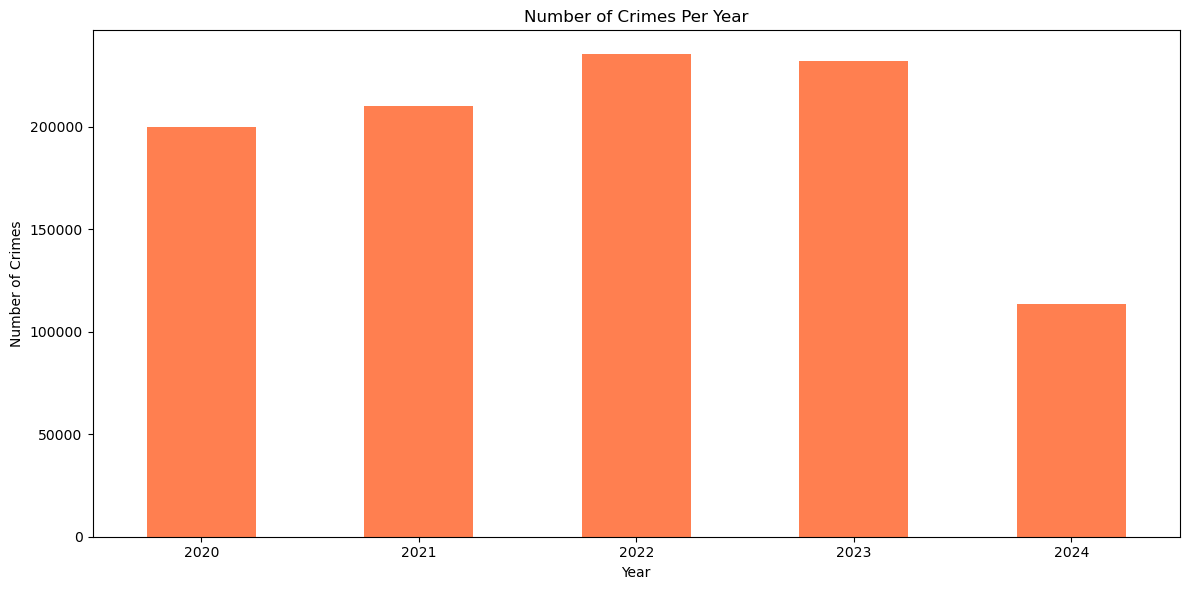

In [6]:
# Convert Dates & Extract Features
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Extract time-based features
df['occ_year'] = df['DATE OCC'].dt.year
df['occ_month'] = df['DATE OCC'].dt.month
df['occ_day'] = df['DATE OCC'].dt.day
df['occ_dayofweek'] = df['DATE OCC'].dt.dayofweek

# TIME OCC likely HHMM format
df['occ_hour'] = (df['TIME OCC'] // 100).astype(int)

df['year'] = df['DATE OCC'].dt.year

# Calculate number of crimes per year
crimes_per_year = df['year'].value_counts().sort_index()

# Total number of crimes
total_crimes = df.shape[0]

# Display total crimes and crimes per year
print("Total number of crimes:", total_crimes)
print("\nCrimes per year:\n", crimes_per_year)

# Calculate percent increase from 2020 to 2023 if data is available
if 2020 in crimes_per_year.index and 2023 in crimes_per_year.index:
    crimes_2020 = crimes_per_year[2020]
    crimes_2023 = crimes_per_year[2023]
    percent_increase = ((crimes_2023 - crimes_2020) / crimes_2020) * 100
    print(f"\nPercent increase from 2020 to 2023: {percent_increase:.2f}%")
else:
    print("\nData for 2020 or 2023 is not available to calculate the increase.")

# Plot bar chart
plt.figure(figsize=(12, 6))
crimes_per_year.plot(kind='bar', color='coral')
plt.title('Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Key Observations:
1. Crime rates remained relatively stable between 2020 and 2021.
2. A notable peak in crimes occurred in 2022.
3. The decline in 2024 is potentially due to partial reporting, as the year is ongoing.

#### Insights:
This visualization highlights the temporal distribution of crimes, which can be useful for identifying trends, investigating factors contributing to the peak in 2022, and planning for future interventions.


### Number of Crimes by Victim Descent

This horizontal bar chart displays the total number of crimes reported based on the descent of the victims. Key observations:

- **Hispanic/Latin/Mexican (H):** The largest group, with 293,692 reported crimes, significantly higher than other categories.
- **White (W):** The second-largest group, with 198,501 crimes reported.
- **Black (B):** Accounts for 134,685 crimes, making it the third-largest group.
- **Unknown (X):** Represents 104,534 cases where the victim's descent is not identified.
- Other categories, such as **Other Asian (A)**, **Korean (K)**, and **Filipino (F)**, have significantly fewer reported crimes.


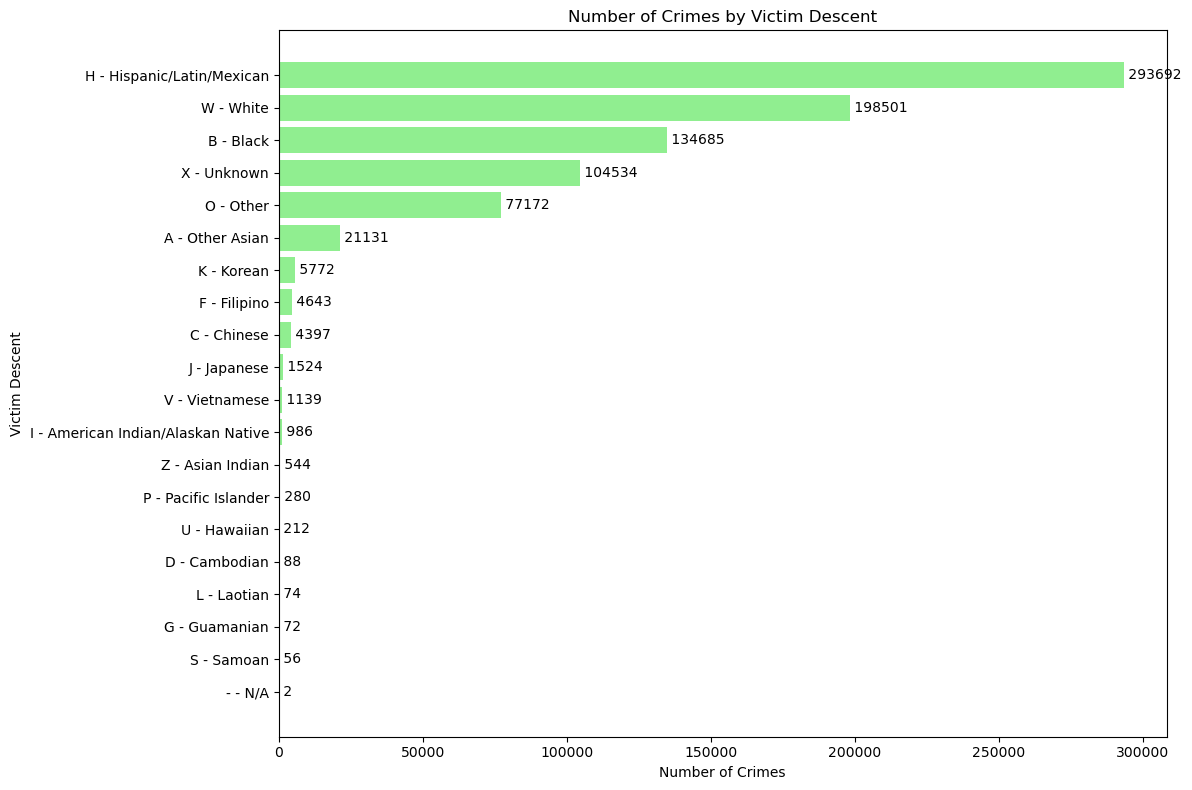

In [7]:
crime_by_descent = df['Vict Descent'].value_counts().sort_values(ascending=True)

# Define descent meanings
descent_meanings = {
    'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian',
    'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean',
    'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan',
    'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'
}

# Replace codes with descriptive labels
labels_with_descriptions = [f"{idx} - {descent_meanings.get(idx, 'N/A')}" for idx in crime_by_descent.index]
crime_by_descent.index = labels_with_descriptions

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(crime_by_descent.index, crime_by_descent.values, color='lightgreen')
plt.title('Number of Crimes by Victim Descent')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Descent')

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()

#### Insights:
This visualization provides a detailed look at the victim demographics based on crime type, allowing for deeper insights into age-related vulnerability or trends in specific crime categories.

### Top 10 Most Frequent Crimes

This bar chart highlights the 10 most frequently occurring crimes in the dataset. Key insights include:

- **Vehicle Theft:** The most common crime, with over 100,000 incidents reported.
- **Simple Assault and Burglary:** These crimes rank second and third, with significant frequency.
- **Identity Theft:** Also a prevalent crime, reflecting trends in cyber-related offenses.
- **Other Common Crimes:** Include vandalism, aggravated assault, petty theft, and intimate partner violence.


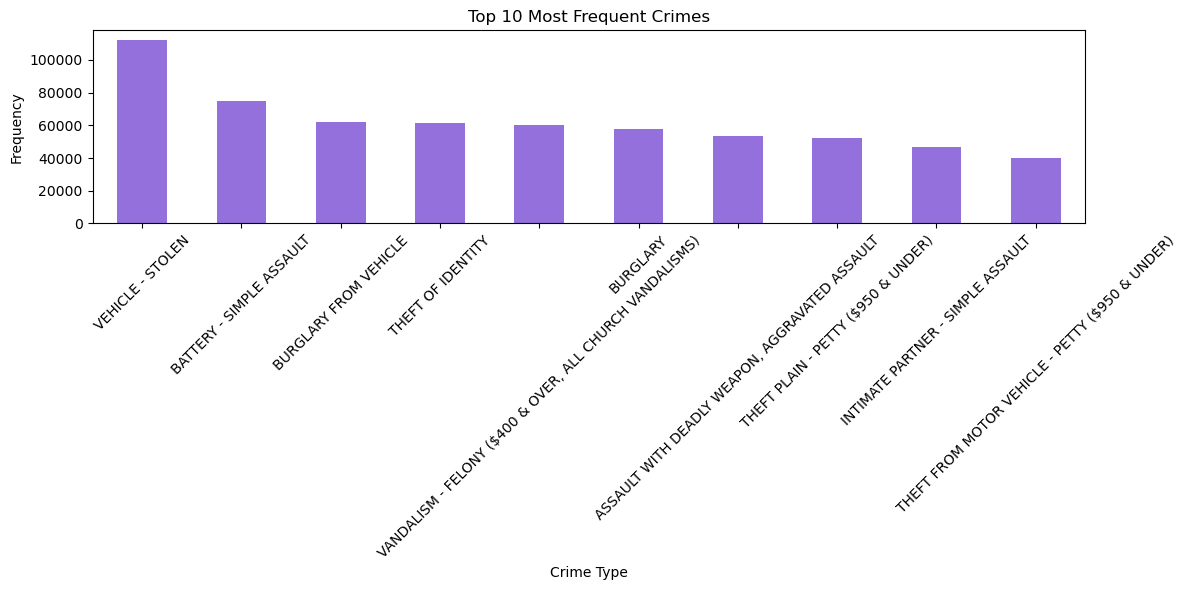

In [8]:
crime_frequencies = df['Crm Cd Desc'].value_counts()

# Select top 10 most frequent crimes
top_crimes = crime_frequencies.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_crimes.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Most Frequent Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:
- Vehicle theft dominates the chart, suggesting it may be a major concern for law enforcement and public safety initiatives.
- Crimes like simple assault and burglary remain consistently high, pointing to areas where preventive measures could be targeted.

#### Insights:
Understanding the frequency of specific crimes can help prioritize resource allocation, develop prevention strategies, and identify trends over time.

### Geographic Distribution of Crimes in Los Angeles

This map visualizes the geographic distribution of crimes reported in the Los Angeles area. Each red marker represents the location of a reported crime, plotted using latitude and longitude coordinates from the dataset.

In [9]:
# Initialize map centered around Los Angeles coordinates
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Sample a subset for performance
sample_df = df.sample(n=10000, random_state=42)

# Add points to the map
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=1,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(la_map)

# Display the map
la_map

#### Observations:
- **Crime Density:** There is a high concentration of crimes in central Los Angeles and the surrounding metropolitan areas.
- **Suburban Spread:** Crimes are also dispersed across suburbs such as Santa Monica, Torrance, and Glendale, though with lower density compared to central areas.
- **Geographic Coverage:** The visualization effectively highlights how crime is distributed across various neighborhoods, with some areas experiencing significantly more reported incidents.

#### Insights:
- The dense clustering in urban centers indicates potential hotspots for criminal activity, likely due to higher population density and urban dynamics.
- Policymakers and law enforcement can use this visualization to identify areas requiring more focused resources or crime prevention measures.
- Further analysis can incorporate time-based trends to understand how crime patterns shift geographically over time.

#### Implementation Details:
This map was created using the Folium library, which allows for interactive visualization of geospatial data. The latitude and longitude values from the dataset were used to pinpoint the exact locations of crimes.

### Data Preprocessing and Feature Engineering

#### Data Cleaning: Dropping Irrelevant Columns
In this step, unnecessary or irrelevant columns were dropped from the dataset to simplify the analysis and modeling process. These columns were removed for the following reasons:

- Redundancy: Columns like Crm Cd Desc and Status Desc are textual descriptions of existing categorical variables and do not add additional information for modeling.
- Irrelevance: Columns such as LOCATION and Cross Street are not directly useful for analysis or prediction in this context.
- High Missingness: Columns like Crm Cd 2, Crm Cd 3, and Crm Cd 4 contain a large number of missing values, making them unreliable for inclusion.

In [10]:
cols_to_drop = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Crime Cd',
               'Weapon Used Cd', 'Weapon Desc', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'year', 'LOCATION',
               'Mocodes', 'Cross Street', 'AREA NAME', 'Crm Cd Desc', 'Crm Cd Desc', 'Premis Desc', 'Status Desc']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

By dropping these columns, the dataset now focuses on the most relevant features for analysis and modeling. This step ensures that the dataset is concise, easier to work with, and free of unnecessary noise.

#### Handling Missing or Invalid Values

In [11]:
# Remove rows where Vict Age <= 0 as they are invalid
df = df[df['Vict Age'] > 0]

# Categorical columns to consider
cat_cols = []
num_cols = []

for col in df.columns:
    if df[col].dtype == object:
        cat_cols.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        num_cols.append(col)

# Known categorical columns from description (treat numeric codes that represent categories as categorical):
cat_candidates = ['AREA', 'Part 1-2', 'Vict Sex', 'Vict Descent', 'Status']

# Convert these known categorical columns to string type to ensure correct handling
for c in cat_candidates:
    if c in df.columns:
        df.loc[:, c] = df[c].astype(str)

# Update categorical columns list
cat_cols = [c for c in df.columns if df[c].dtype == object]

# Identify numeric columns (excluding 'Vict Age')
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in ['Vict Age']]

# Identify categorical columns excluding the target
categorical_cols = [c for c in cat_cols if c != 'Status']

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
df.loc[:, numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Categorical columns: impute with 'Unknown'
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df.loc[:, categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Handle missing 'Status' (classification target)
if df['Status'].isna().sum() > 0:
    status_mode = df['Status'].mode()[0]
    df['Status'] = df['Status'].fillna(status_mode)


/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469/3279764475.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '3' '9' ... '14' '4' '3']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, c] = df[c].astype(str)
/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469/3279764475.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, c] = df[c].astype(str)


#### Feature Engineering: Handling High Cardinality Columns

Columns with high cardinality (i.e., columns with a large number of unique values) can pose challenges for machine learning models, as they increase complexity and may lead to overfitting. To address this, the values in high cardinality columns were replaced with their frequency counts. This transformation reduces the dimensionality while preserving the information about how common each value is.

Columns Transformed:
- LOCATION: Contains unique geographic identifiers for each crime.
- Crm Cd: Represents numeric crime codes with many distinct values.

In [12]:
high_card_cols = ['LOCATION','Crm Cd']

for col in high_card_cols:
    if col in df.columns:
        freq = df[col].value_counts()
        df.loc[:, col] = df[col].map(freq).astype(float)  # Ensure float dtype

#### Feature Engineering: One-Hot Encoding Low-Cardinality Categorical Features
Low-cardinality categorical features (features with a small number of unique values) are suitable for one-hot encoding. This process creates binary indicator columns for each unique category, ensuring these features are represented numerically while preserving their categorical nature.

In [13]:
# Low cardinality:
low_card_cat = ['Part 1-2','Vict Sex','Vict Descent']

df['AREA'] = df['AREA'].astype(str)
low_card_cat.append('AREA')

# One-hot encode low cardinality categorical features
df = pd.get_dummies(df, columns=low_card_cat, drop_first=True)

#### Target Preparation and Feature Selection

1. Regression Target: *Vict Age*
2. Classification Target: *Status*

In [14]:
y_reg = df['Vict Age']

# Map Status to numeric codes
status_map = {val: i for i, val in enumerate(df['Status'].unique())}
df['Status'] = df['Status'].map(status_map)
y_class = df['Status']

# Features: drop targets and any unnecessary identifiers
X = df.drop(columns=['Vict Age', 'Status'])

#### Correlation Matrix of Features

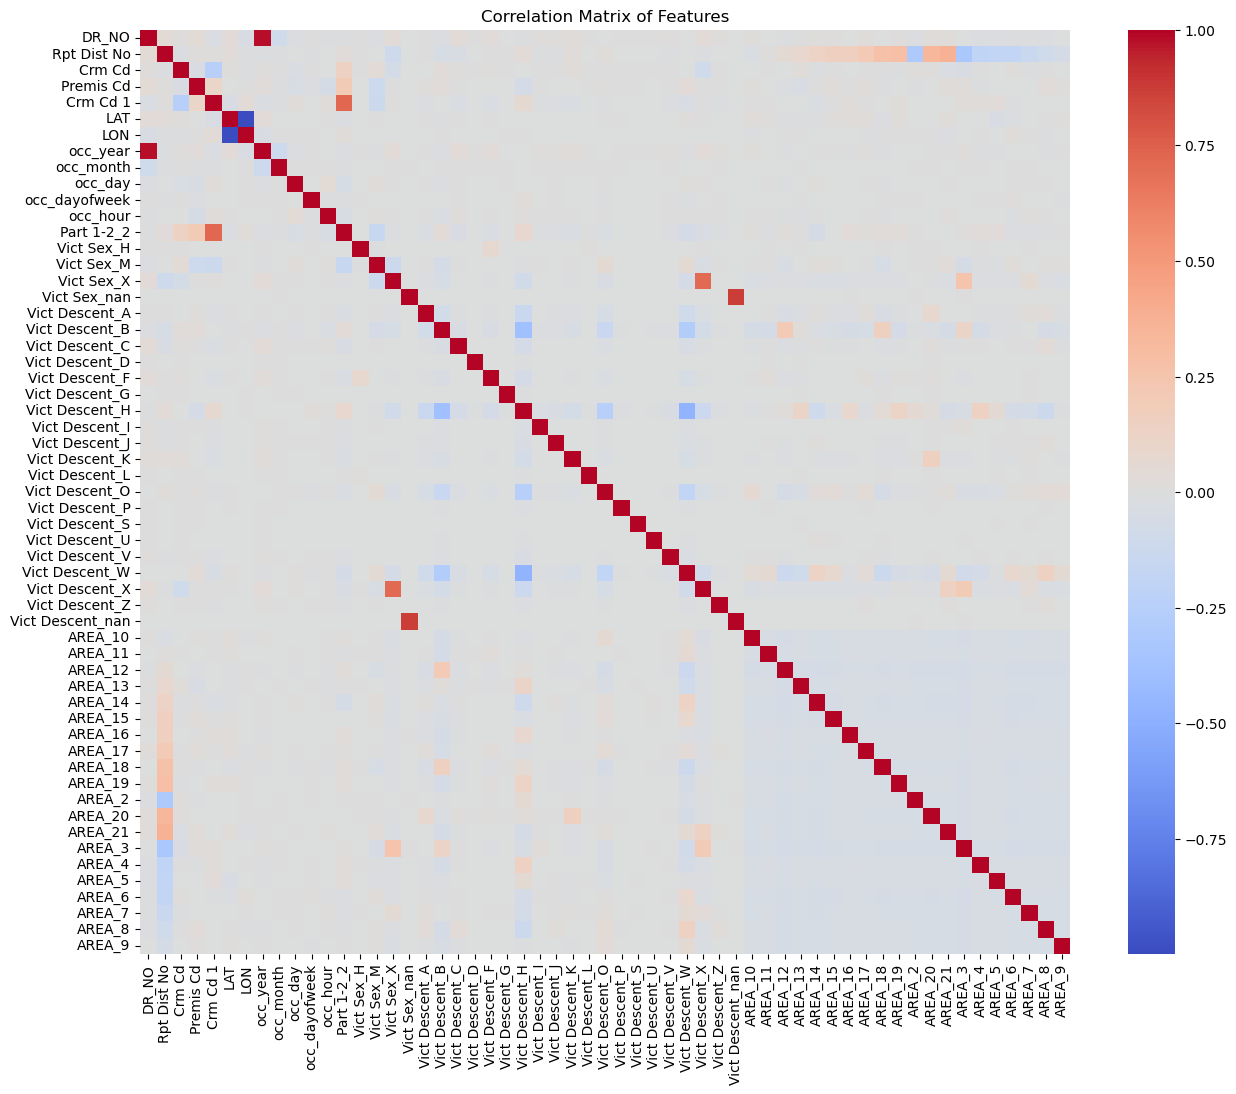

In [15]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

##### Observations:
1. High Positive Correlations:
Certain features, such as (occ_year, DR_NO) or (Vict Sex M and Vict Descent X), exhibit strong positive correlations (closer to red in the heatmap), suggesting a potential relationship between them.
2. High Negative Correlations:
Some feature pairs have strong negative correlations such as Vict Descent H and Vict Descent W, indicating an inverse relationship.
3. Sparse Correlations:
Most features show weak or no correlation, which is expected in datasets with categorical and engineered features like one-hot encoded variables.
##### Insights:
- Features with high correlations might introduce redundancy, which can be addressed during feature selection or dimensionality reduction (e.g., using PCA).
- Uncorrelated or weakly correlated features suggest that the dataset retains diverse information, which could be valuable for machine learning models.

#### Train-Test Split
To evaluate the performance of machine learning models, the dataset was split into training and testing sets. This ensures that the model is trained on one subset of the data and evaluated on unseen data for validation.

In [16]:
X_reg = X.copy()
y_reg = y_reg.copy()


X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# For Classification
X_class = X.copy()
y_class = y_class.copy()

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

In [17]:
X_reg_train.fillna(X_reg_train.median(), inplace=True)
X_reg_test.fillna(X_reg_test.median(), inplace=True)

# Replace Inf/-Inf with large finite values
X_reg_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_reg_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill remaining NaNs with median
X_reg_train.fillna(X_reg_train.median(), inplace=True)
X_reg_test.fillna(X_reg_test.median(), inplace=True)

X_class_train.fillna(X_class_train.median(), inplace=True)
X_class_test.fillna(X_class_test.median(), inplace=True)

# Replace Inf/-Inf with large finite values
X_class_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_class_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill remaining NaNs with median
X_class_train.fillna(X_class_train.median(), inplace=True)
X_class_test.fillna(X_class_test.median(), inplace=True)

#### Scaling Numerical Features
Feature scaling is a critical step to standardize numeric features and improve model performance.

In [18]:
# To avoid scaling one-hot encoded features, identify which columns are one-hot encoded
one_hot_cols = [col for col in X_reg_train.columns if '_' in col]

# Columns to scale: All numeric columns excluding one-hot encoded
columns_to_scale = [col for col in high_card_cols if col in X_reg_train.columns] + numeric_cols
columns_to_scale = list(set(columns_to_scale))  # Remove duplicates

# Ensure all columns to scale are of float type
X_reg_train.loc[:, columns_to_scale] = X_reg_train.loc[:, columns_to_scale].astype(float)
X_reg_test.loc[:, columns_to_scale] = X_reg_test.loc[:, columns_to_scale].astype(float)
X_class_train.loc[:, columns_to_scale] = X_class_train.loc[:, columns_to_scale].astype(float)
X_class_test.loc[:, columns_to_scale] = X_class_test.loc[:, columns_to_scale].astype(float)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_reg_train.loc[:, columns_to_scale] = scaler.fit_transform(X_reg_train.loc[:, columns_to_scale])
X_reg_test.loc[:, columns_to_scale] = scaler.transform(X_reg_test.loc[:, columns_to_scale])

X_class_train.loc[:, columns_to_scale] = scaler.fit_transform(X_class_train.loc[:, columns_to_scale])
X_class_test.loc[:, columns_to_scale] = scaler.transform(X_class_test.loc[:, columns_to_scale])

/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469/2845850050.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.46211791  1.30140254 -0.30412776 ... -0.54925929 -1.07361347
  0.41503293]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_reg_train.loc[:, columns_to_scale] = scaler.fit_transform(X_reg_train.loc[:, columns_to_scale])
/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469/2845850050.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.0156923   0.98785241  0.48608005 ...  0.98785241 -1.01923701
 -1.01923701]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_reg_train.loc[:, columns_to_scale] = scaler.fit_transform(X_reg_train.loc[:, columns_to_scale])
/var/folders/1s/8fc5px094r56t3mgz8mzt_tm0000gp/T/ipykernel_51469

#### Final Verification
- The regression dataset was successfully split into training (80%) and testing (20%) sets. The features have been preprocessed and scaled, ensuring the model receives clean and consistent inputs.

- The classification dataset was also correctly split into training (80%) and testing (20%) sets. The feature engineering steps, including one-hot encoding and scaling, were applied consistently across both training and testing data.

In [19]:
print("Regression Train shape:", X_reg_train.shape, y_reg_train.shape)
print("Regression Test shape:", X_reg_test.shape, y_reg_test.shape)
print("Classification Train shape:", X_class_train.shape, y_class_train.shape)
print("Classification Test shape:", X_class_test.shape, y_class_test.shape)

Regression Train shape: (581574, 57) (581574,)
Regression Test shape: (145394, 57) (145394,)
Classification Train shape: (581574, 57) (581574,)
Classification Test shape: (145394, 57) (145394,)


#### Dimensionality Reduction using PCA
Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset while retaining 95% of the variance in the data. This approach simplifies the dataset, reduces computational complexity, and minimizes the risk of overfitting.

In [20]:

# Initialize PCA with desired number of components or explained variance
pca_reg = PCA(n_components=0.95, random_state=42)  # Retain 95% variance

# Fit PCA on training data
pca_reg.fit(X_reg_train[columns_to_scale])

# Transform training and testing data
X_reg_train_pca = pca_reg.transform(X_reg_train[columns_to_scale])
X_reg_test_pca = pca_reg.transform(X_reg_test[columns_to_scale])

# Convert transformed data to DataFrame
pca_columns_reg = [f'PC{i+1}' for i in range(X_reg_train_pca.shape[1])]
X_reg_train_pca_df = pd.DataFrame(X_reg_train_pca, columns=pca_columns_reg, index=X_reg_train.index)
X_reg_test_pca_df = pd.DataFrame(X_reg_test_pca, columns=pca_columns_reg, index=X_reg_test.index)

In [21]:
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA with desired number of components or explained variance
pca_class = PCA(n_components=0.95, random_state=42)  # Retain 95% variance

# Fit PCA on training data
pca_class.fit(X_class_train[columns_to_scale])

# Transform training and testing data
X_class_train_pca = pca_class.transform(X_class_train[columns_to_scale])
X_class_test_pca = pca_class.transform(X_class_test[columns_to_scale])

# Convert transformed data to DataFrame
pca_columns_class = [f'PC{i+1}' for i in range(X_class_train_pca.shape[1])]
X_class_train_pca_df = pd.DataFrame(X_class_train_pca, columns=pca_columns_class, index=X_class_train.index)
X_class_test_pca_df = pd.DataFrame(X_class_test_pca, columns=pca_columns_class, index=X_class_test.index)


#### Cumulative Explained Variance Plots
1. Regression PCA Plot:
- Displays the cumulative explained variance as a function of the number of principal components.
- Shows that approximately 9 components are required to retain 95% of the variance.
2. Classification PCA Plot:
- Similar to the regression task, around 9 components are needed to retain 95% of the variance in the classification dataset.

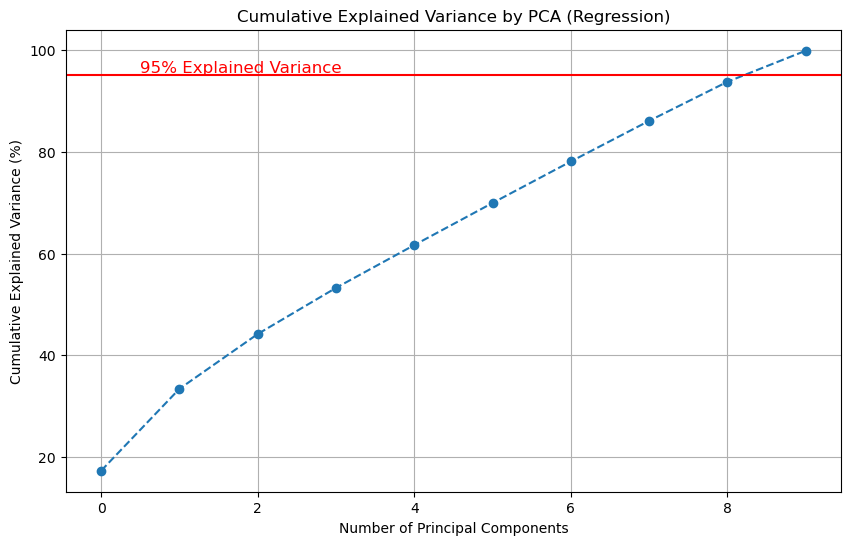

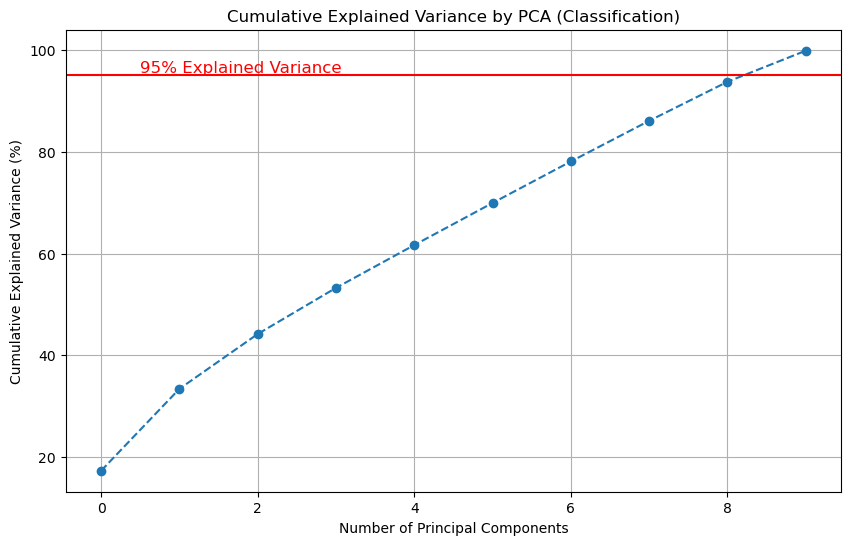

In [22]:
def plot_explained_variance(pca, title):
    plt.figure(figsize=(10,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.grid(True)
    plt.axhline(y=95, color='r', linestyle='-')
    plt.text(0.5, 95.5, '95% Explained Variance', color = 'red', fontsize=12)
    plt.show()

# Plot for Regression PCA
plot_explained_variance(pca_reg, 'Cumulative Explained Variance by PCA (Regression)')

# Plot for Classification PCA
plot_explained_variance(pca_class, 'Cumulative Explained Variance by PCA (Classification)')


##### Insights and Benefits:
- Dimensionality Reduction: Both regression and classification datasets have been reduced from 57 features to ~9 principal components, making the datasets more manageable.
- Efficiency: Reduced dimensionality improves computational efficiency for downstream machine learning tasks.
- Interpretability: The PCA-transformed datasets simplify feature space while retaining the core information required for predictions.

This process ensures a balance between dataset complexity and information retention, setting a strong foundation for model training and evaluation.

## Classification Model Training

In [23]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

def evaluate_classification(y_true, y_pred, y_proba=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    if y_proba is not None:
        roc_auc = roc_auc_score(y_true, y_proba, multi_class='ovr')
        print(f"ROC-AUC: {roc_auc:.4f}")


### Logistic Regression for Classification
Logistic Regression is a widely used linear model for binary and multi-class classification tasks. For this task, it was applied to predict the Status of a crime using the PCA-transformed features from the classification dataset.

The logistic regression model was initialized with the following parameters:
- max_iter=1000: Increased maximum iterations to ensure convergence.
- solver='liblinear': A robust solver suitable for small-to-medium datasets and L1/L2 regularization.
- random_state=42: Ensures reproducibility of results.

The model was trained on the PCA-transformed training data (X_class_train_pca_df) and target labels (y_class_train).

In [25]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Train model
log_reg.fit(X_class_train_pca_df, y_class_train)

# Predict on test set
y_class_pred_lr = log_reg.predict(X_class_test_pca_df)
y_class_proba_lr = log_reg.predict_proba(X_class_test_pca_df)

# Evaluate
print("Logistic Regression Performance:")
evaluate_classification(y_class_test, y_class_pred_lr, y_class_proba_lr)


Logistic Regression Performance:
Accuracy: 0.7696
Precision: 0.6009
Recall: 0.7696
F1-Score: 0.6695
ROC-AUC: 0.7014


#### Interpretation of Results:
- Strengths:
    - The model demonstrates solid accuracy and recall, indicating it can correctly classify a large proportion of cases and effectively identify positive samples.
    - A ROC-AUC of 70.14% suggests reasonable discriminatory power, meaning the model can distinguish between the classes better than random guessing.
- Weaknesses:
    - The precision of 60.09% indicates that the model has some difficulty avoiding false positives, which may result in misclassification of negative samples as positive.
    - The F1-Score reflects a trade-off between precision and recall, highlighting that improvements in precision could enhance overall performance.

### Decision Tree Classifier for Classification
A Decision Tree Classifier was used to predict the Status of a crime, leveraging the PCA-transformed features from the classification dataset. Decision Trees are powerful, interpretable models that can capture complex patterns in data.

To identify the best-performing Decision Tree model, a grid search was performed over the following hyperparameters:
- max_depth: Controls the maximum depth of the tree ([10, 20, 30]).
- min_samples_split: Minimum number of samples required to split an internal node ([2, 5, 10]).
- min_samples_leaf: Minimum number of samples required to be at a leaf node ([1, 2, 4]).

The grid search used cross-validation with the following configuration:
- Cross-validation strategy: K-Fold cross-validation (kf).
- Scoring metric: Accuracy.
- Parallel processing: Utilized all available cores (n_jobs=-1) for faster computation.

In [26]:

# Initialize Decision Tree Classifier
dt_class = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid_dt_class = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_dt_class = GridSearchCV(estimator=dt_class, param_grid=param_grid_dt_class, 
                             cv=kf, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_dt_class.fit(X_class_train_pca_df, y_class_train)

# Best estimator
best_dt_class = grid_dt_class.best_estimator_

# Predict on test set
y_class_pred_dt = best_dt_class.predict(X_class_test_pca_df)
y_class_proba_dt = best_dt_class.predict_proba(X_class_test_pca_df)

# Evaluate
print("Decision Tree Classification Performance:")
evaluate_classification(y_class_test, y_class_pred_dt, y_class_proba_dt)

# Print best parameters
print("Best Parameters for Decision Tree:", grid_dt_class.best_params_)


Decision Tree Classification Performance:
Accuracy: 0.7783
Precision: 0.7107
Recall: 0.7783
F1-Score: 0.7232
ROC-AUC: 0.7452
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


#### Interpretation of Results:
- Strengths:
    - The higher precision indicates fewer false positives compared to the logistic regression model.
    - A balanced F1-Score suggests the model effectively manages the trade-off between precision and recall.
- Weaknesses:
    - Despite improvements, the ROC-AUC indicates room for further optimization or exploration of more advanced models.

## Predicting Victim Age (Regression Task)

In [27]:
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

In [28]:
def plot_actual_vs_predicted(y_true, y_pred, model_name='Model', title='Actual vs Predicted'):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.grid(True)
    plt.show()

def plot_residuals_distribution(y_true, y_pred, model_name='Model', title='Residuals Distribution'):
    residuals = y_true - y_pred
    plt.figure(figsize=(8,6))
    sns.histplot(residuals, kde=True, bins=30, color='skyblue')
    plt.title(f'{model_name}: Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

### Linear Regression for Regression

Linear Regression is a simple and interpretable model that predicts continuous target variables by minimizing the squared differences between predicted and actual values. In this case, it was applied to predict the victim's age (Vict Age) using the PCA-transformed features from the regression dataset.

In [29]:
# Initialize Logistic Regression
lin_reg = LinearRegression()

# Train model
lin_reg.fit(X_reg_train_pca_df, y_class_train)

# Predict on test set
y_reg_pred_lr = lin_reg.predict(X_reg_test_pca_df)

# Evaluate
print("Linear Regression Performance:")
evaluate_regression(y_reg_test, y_reg_pred_lr)


Linear Regression Performance:
MAE: 39.12
MSE: 1773.33
RMSE: 42.11
R²: -6.2900


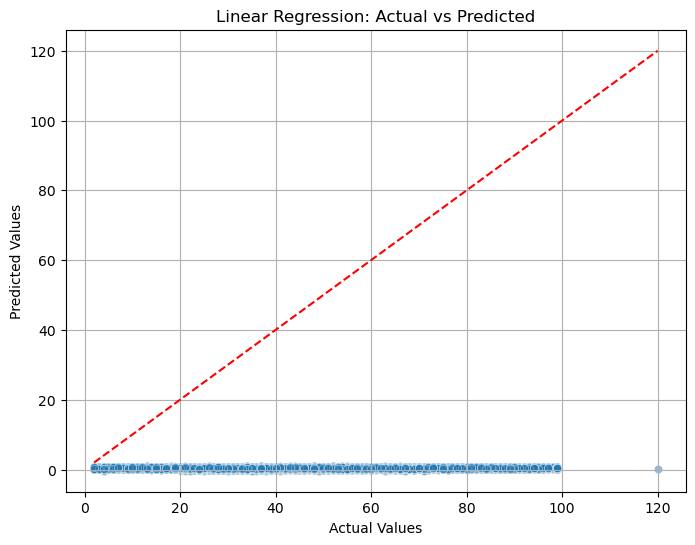

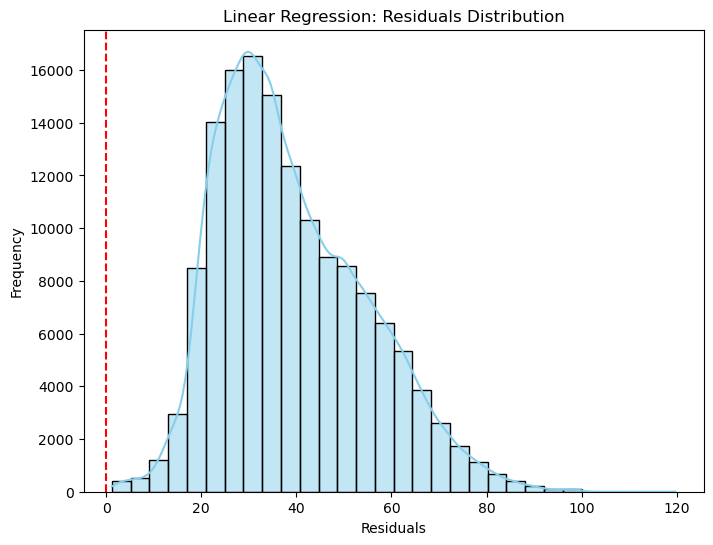

In [ ]:
plot_actual_vs_predicted(y_reg_test, y_reg_pred_lr, model_name='Linear Regression')
plot_residuals_distribution(y_reg_test, y_reg_pred_lr, model_name='Linear Regression')

#### Interpretation of Results:

The Linear Regression model performs poorly in predicting the victim's age, with high error metrics and a negative R² score. 

### Decision Tree Regressor for Regression
The Decision Tree Regressor is a non-linear model that splits the data into subsets based on feature values, creating a tree structure for predictions. It is highly flexible and can capture complex relationships between features and the target variable.

To optimize the model's performance, a grid search was conducted over the following hyperparameters:
- max_depth: Maximum depth of the tree ([10, 20, 30]).
- min_samples_split: Minimum number of samples required to split an internal node ([2, 5, 10]).
- min_samples_leaf: Minimum number of samples required to be at a leaf node ([1, 2, 4]).

The grid search was performed with:
- Cross-validation strategy: K-Fold cross-validation (kf).
- Scoring metric: Accuracy.
- Parallel processing: Utilized all available cores (n_jobs=-1).

In [30]:

# Initialize Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid_dt_reg = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_dt_reg = GridSearchCV(estimator=dt_reg, param_grid=param_grid_dt_reg, 
                             cv=kf, n_jobs=-1)

# Fit GridSearchCV
grid_dt_reg.fit(X_reg_train_pca_df, y_reg_train)

# Best estimator
best_dt_reg = grid_dt_reg.best_estimator_

# Predict on test set
y_reg_pred_dt = best_dt_reg.predict(X_reg_test_pca_df)

# Evaluate
print("Decision Tree Regressor Performance:")
evaluate_regression(y_reg_test, y_reg_pred_dt)

# Print best parameters
print("Best Parameters for Decision Tree:", grid_dt_reg.best_params_)


Decision Tree Regressor Performance:
MAE: 12.28
MSE: 228.47
RMSE: 15.12
R²: 0.0608
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


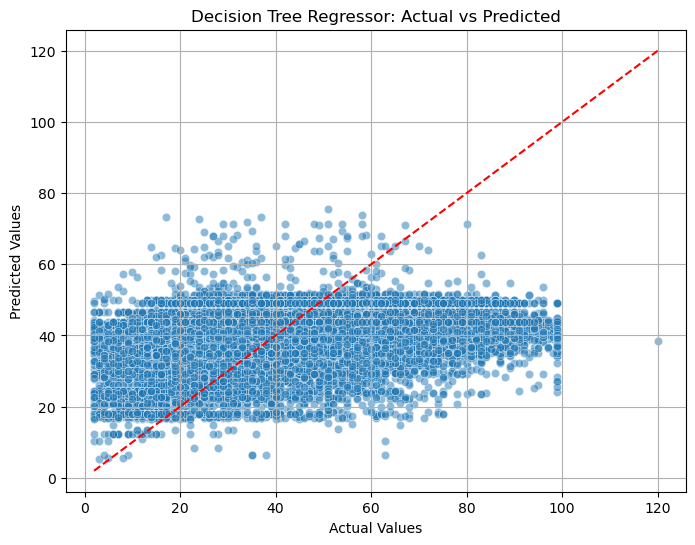

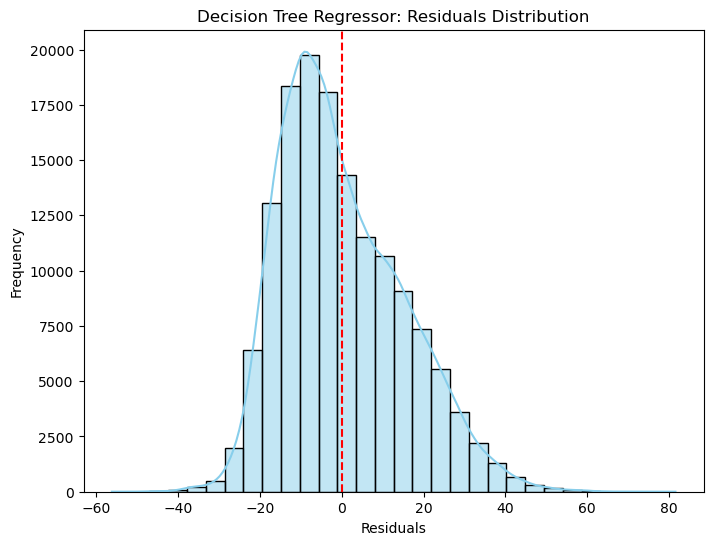

In [31]:
plot_actual_vs_predicted(y_reg_test, y_reg_pred_dt, model_name='Decision Tree Regressor')
plot_residuals_distribution(y_reg_test, y_reg_pred_dt, model_name='Decision Tree Regressor')

#### Interpretation of Results:
- Strengths:
    - Significant reduction in prediction error (MAE and RMSE) compared to Linear Regression.
    - The non-linear nature of the model helps capture relationships that Linear Regression fails to model.
- Weaknesses:
    - The R² score remains low, indicating that a large proportion of the variance in the target variable remains unexplained.
    - There is potential for overfitting if the model complexity (e.g., tree depth) is not carefully tuned.

The Decision Tree Regressor outperforms the Linear Regression model, demonstrating lower error metrics and better variance explanation. However, the low R² score suggests that further optimization or alternative model may be needed to achieve better performance.

## Model Comparison and Selection

### Classification Model Performance Summary
A comparative analysis of the three classification models—Logistic Regression, Decision Tree, and was conducted.

In [32]:
# Example structure to store results
classification_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Append results for each model
# Logistic Regression
classification_results['Model'].append('Logistic Regression')
classification_results['Accuracy'].append(accuracy_score(y_class_test, y_class_pred_lr))
classification_results['Precision'].append(precision_score(y_class_test, y_class_pred_lr, average='weighted', zero_division=0))
classification_results['Recall'].append(recall_score(y_class_test, y_class_pred_lr, average='weighted', zero_division=0))
classification_results['F1-Score'].append(f1_score(y_class_test, y_class_pred_lr, average='weighted', zero_division=0))
classification_results['ROC-AUC'].append(roc_auc_score(y_class_test, y_class_proba_lr, multi_class='ovr'))

# Decision Tree
classification_results['Model'].append('Decision Tree')
classification_results['Accuracy'].append(accuracy_score(y_class_test, y_class_pred_dt))
classification_results['Precision'].append(precision_score(y_class_test, y_class_pred_dt, average='weighted', zero_division=0))
classification_results['Recall'].append(recall_score(y_class_test, y_class_pred_dt, average='weighted', zero_division=0))
classification_results['F1-Score'].append(f1_score(y_class_test, y_class_pred_dt, average='weighted', zero_division=0))
classification_results['ROC-AUC'].append(roc_auc_score(y_class_test, y_class_proba_dt, multi_class='ovr'))

# Convert to DataFrame
classification_summary = pd.DataFrame(classification_results)

# Display summary
print("\nClassification Model Performance Summary:")
print(classification_summary)



Classification Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.769647   0.600927  0.769647  0.669542  0.701429
1        Decision Tree  0.778271   0.710693  0.778271  0.723193  0.745205


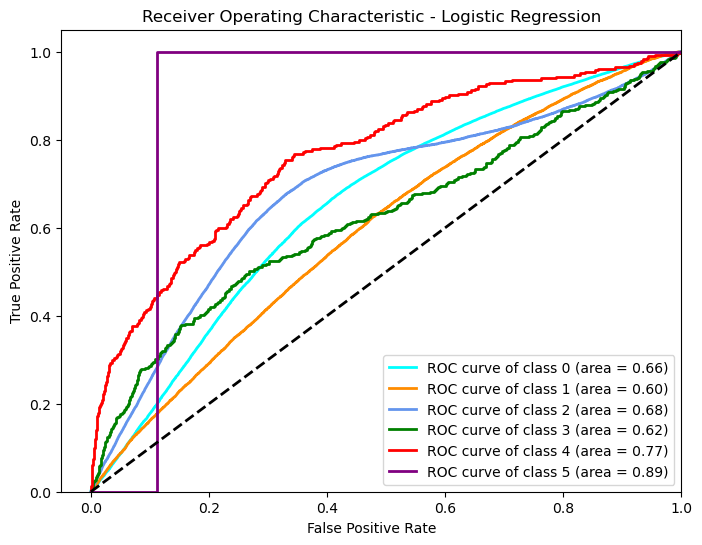

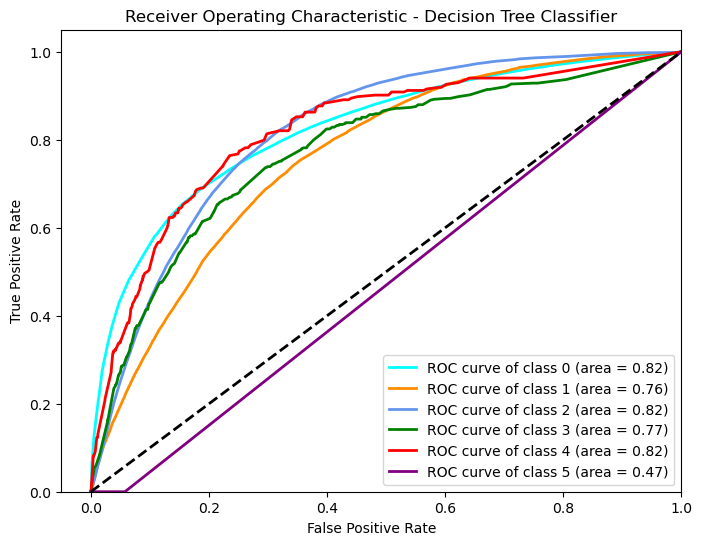

In [33]:
# Binarize the output for ROC curves
classes = np.unique(y_class_train)
y_class_test_binarized = label_binarize(y_class_test, classes=classes)
n_classes = y_class_test_binarized.shape[1]

# Function to plot ROC curves
def plot_roc(y_true, y_proba, classes, n_classes, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(8, 6))
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC for Logistic Regression
plot_roc(y_class_test_binarized, y_class_proba_lr, classes, n_classes, 'Logistic Regression')
plot_roc(y_class_test_binarized, y_class_proba_dt, classes, n_classes, 'Decision Tree Classifier')


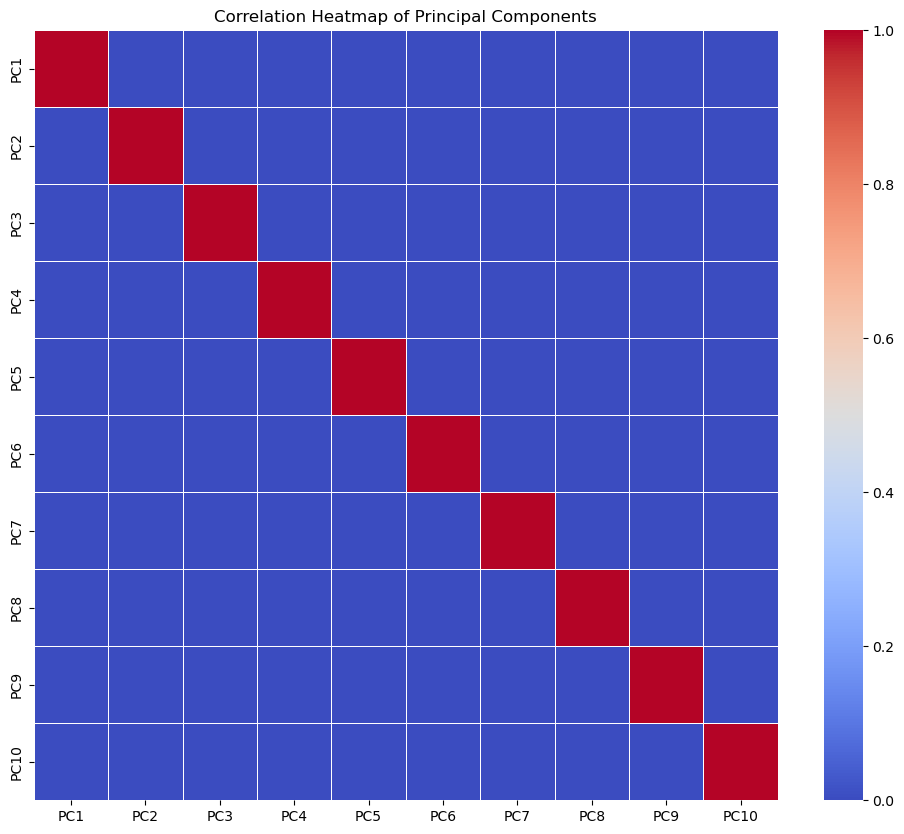

In [34]:
def plot_correlation_heatmap(X, title='Feature Correlation Heatmap'):
    plt.figure(figsize=(12,10))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage on PCA-transformed training data
plot_correlation_heatmap(X_class_train_pca_df, title='Correlation Heatmap of Principal Components')


#### Key Observations:
1. Accuracy: 
    - Decision Tree achieved the highest accuracy at 77.83%, outperforming Logistic Regression (76.96%).
    - While all models perform reasonably well, Decision Tree provides the best balance of precision and recall.

2. Precision: 
    - Decision Tree leads with a precision of 71.07%, indicating fewer false positives compared to other models.
    - Logistic Regression lag slightly, with precision scores of 60.09%.

3. Recall:
    - Decision Tree and Logistic Regression show high recall values of 77.83% and 76.96%, respectively, suggesting they capture most of the actual positive cases.

4. F1-Score:
    - Decision Tree achieves the best F1-Score at 72.32%, reflecting its overall balance between precision and recall.
    - Logistic Regression follow, with F1-Scores of 66.95%, respectively.

5. ROC-AUC:
    - Decision Tree demonstrates the strongest discriminatory power with an ROC-AUC of 74.52%.

    - Logistic Regression achieves an ROC-AUC of 70.14%

#### Insights:

1. Best Overall Performer:
    - The Decision Tree model consistently outperforms the other models across all key metrics, making it the best choice for this classification task.
2. Strengths of Logistic Regression:
    - Logistic Regression delivers strong recall and decent overall performance, making it a reliable baseline model.

### Regression Model Performance Summary
The performance of two regression models—Linear Regression and Decision Tree Regressor—was evaluated using multiple metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² (coefficient of determination), and regression accuracy within a tolerance of ±2.0 units.

In [35]:
def evaluate_regression(y_true, y_pred):
    """
    Evaluates regression performance using MAE, MSE, RMSE, and R².
    
    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values.
    
    Returns:
    - A dictionary containing the computed metrics.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared (R²)': r2
    }

def regression_accuracy(y_true, y_pred, tolerance=2.0):
    """
    Calculates the percentage of predictions within a specified tolerance.
    
    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values.
    - tolerance: The maximum allowable difference between y_true and y_pred for a prediction to be considered 'accurate'.
    
    Returns:
    - accuracy_percentage: Percentage of predictions within the tolerance.
    """
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy_percentage = correct_predictions.mean() * 100
    print(f"Regression Accuracy (within ±{tolerance} units): {accuracy_percentage:.2f}%")


In [36]:
reg_results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R-squared (R²)': []
}

models = {
    'Linear Regression': [lin_reg, y_reg_pred_lr],
    'Decision Tree Regressor': [best_dt_reg, y_reg_pred_dt]
}

for model_name, model in models.items():

    metrics = evaluate_regression(y_reg_test, model[1])
    
    # Print evaluation metrics
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"R-squared (R²): {metrics['R-squared (R²)']:.4f}")
    
    # Optionally, calculate regression accuracy within a tolerance
    regression_accuracy(y_reg_test, model[1], tolerance=2.0)
    
    # Append results to reg_results dictionary
    reg_results['Model'].append(model_name)
    reg_results['MAE'].append(metrics['MAE'])
    reg_results['MSE'].append(metrics['MSE'])
    reg_results['RMSE'].append(metrics['RMSE'])
    reg_results['R-squared (R²)'].append(metrics['R-squared (R²)'])


Mean Absolute Error (MAE): 39.12
Mean Squared Error (MSE): 1773.33
Root Mean Squared Error (RMSE): 42.11
R-squared (R²): -6.2900
Regression Accuracy (within ±2.0 units): 0.06%
Mean Absolute Error (MAE): 12.28
Mean Squared Error (MSE): 228.47
Root Mean Squared Error (RMSE): 15.12
R-squared (R²): 0.0608
Regression Accuracy (within ±2.0 units): 9.01%


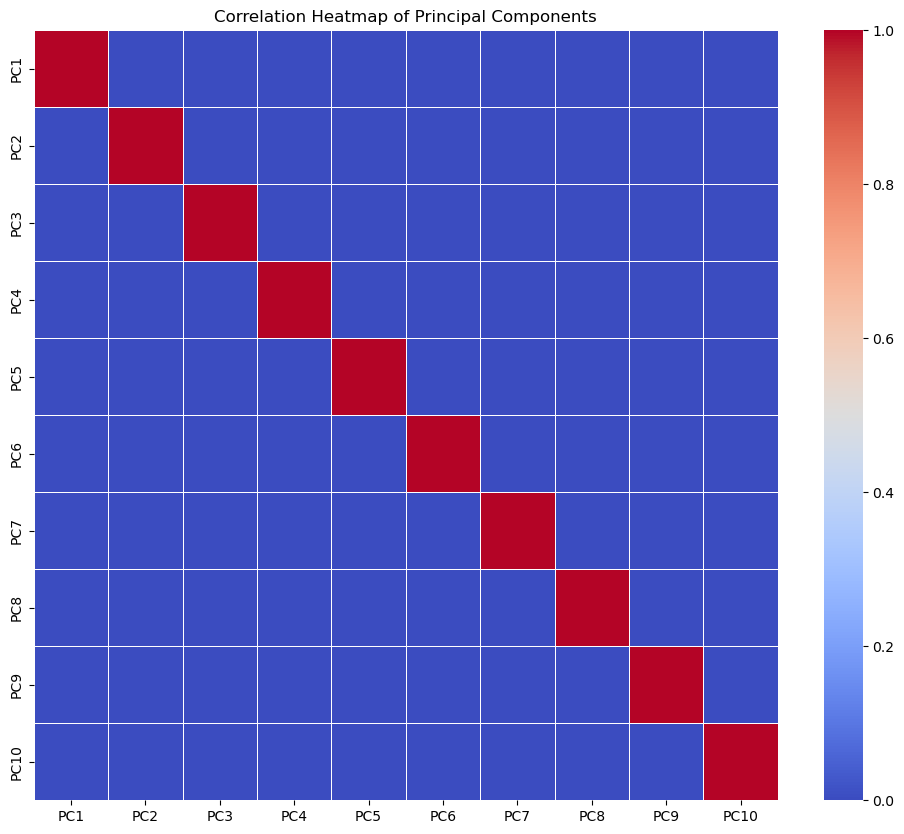

In [37]:
def plot_correlation_heatmap(X, title='Feature Correlation Heatmap'):
    plt.figure(figsize=(12,10))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage on PCA-transformed training data
plot_correlation_heatmap(X_reg_train_pca_df, title='Correlation Heatmap of Principal Components')


Key Observations
1. Error Metrics (MAE, MSE, RMSE):
    - Decision Tree Regressor:
        - Significantly outperforms Linear Regression in all error metrics.
        - The MAE of 12.28 and RMSE of 15.12 indicate much lower average and root mean squared prediction errors compared to Linear Regression.
    - Linear Regression:
        - High MAE (39.12) and RMSE (42.11) suggest that the model is unable to predict accurately for this dataset.
2. R² Score:
    - Linear Regression:
        - A negative R² value (-6.29) indicates that the model performs far worse than a simple mean predictor, failing to explain any variance in the target variable.
    - Decision Tree Regressor:
        - Achieves a modest R² of 0.0605, explaining about 6.05% of the variance in the target variable.
3. Regression Accuracy (±2 units):
    - Decision Tree Regressor:
        - Achieves a regression accuracy of 9.02%, meaning that approximately 9% of predictions are within ±2 units of the actual target values.
    - Linear Regression:
        - An accuracy of only 0.06% indicates almost no predictions fall within ±2 units of the actual values.

### Insights:
1. Decision Tree Regressor:
    - Strengths:
        - Performs much better across all metrics, capturing some of the non-linear relationships in the data.
        - Offers significantly lower error rates and better regression accuracy compared to Linear Regression.
    - Weaknesses:
        - A low R² score indicates that much of the variance in the target variable remains unexplained.
2. Linear Regression:
    - Weaknesses:
        - Fails to model the data effectively, as evidenced by high error metrics and a negative R² score.
        - Inappropriate for this dataset due to its inability to capture complex, non-linear patterns.

Best Model: Decision Tree Regressor
Based on the evaluation metrics, the Decision Tree Regressor is the better model for predicting the victim's age (Vict Age). It consistently outperforms Linear Regression in terms of error metrics, regression accuracy, and R² score. However, its modest R² score suggests there is room for improvement.

## Discussion and Conclusion

### Challenges Faced
1. Working with Large and Dirty Data:
    - One of the most significant challenges in this project was handling an enormous amount of dirty data. The dataset contained multiple columns with missing values, inconsistencies, and errors, which required significant preprocessing.
    - Cleaning the data was time-consuming, as decisions had to be made about how to impute missing values, drop irrelevant features, and ensure the cleaned data was suitable for modeling.
    - Some preprocessing issues, such as dealing with categorical and numeric features, required additional care to avoid introducing unintended errors during transformations.
2. Local Machine Limitations:
    - Running machine learning models on a large dataset presented substantial computational challenges on my local machine. The limited memory and processing power caused delays in training models, especially during hyperparameter tuning and cross-validation.
    - Techniques like PCA were used to reduce the dimensionality of the dataset and make it computationally feasible, but this could have potentially removed some important information.
3. Model Limitations:
    - While models like Decision Tree Regressor performed relatively well, the low R² score indicated that significant variance in the target variable remains unexplained. This suggests that the current feature set or model might not fully capture the complexity of the problem.

4. NaN Propagation During Preprocessing
    - Error: While scaling and imputing numeric features, some unexpected NaN values propagated through the dataset. This caused a warning during model training:
    
    [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
    
    - Explanation: This issue might have occurred due to missing values not being handled correctly in a specific column. Debugging this was challenging because it required iterating through the entire preprocessing pipeline to trace where the NaNs originated.

5. Incompatible Data Types During Encoding
    - Error: A Pandas warning appeared when applying transformations to categorical columns:
    
    FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error. Value '[...]' has dtype incompatible with int64.

    - Explanation: This issue arose because some columns initially identified as numeric (e.g., frequency-encoded columns) were later transformed into a format incompatible with the model’s expectations.

6. Class Imbalance in Classification
    - Error: The classification task encountered an imbalance in the target variable (Status). The majority class dominated predictions, causing poor recall for minority classes. The ROC curve showed AUC values close to 0.5 for some classes.
    Explanation: This imbalance led to biased model training, requiring techniques like class weighting or oversampling to improve performance for underrepresented classes.

7. Overfitting in Decision Tree Models
    - Error: During hyperparameter tuning for the Decision Tree Regressor, models with higher depth (e.g., max_depth=30) achieved very low training errors but significantly higher test errors.
    - Explanation: This suggests overfitting due to the model capturing noise in the training data. This issue was resolved by limiting tree depth to max_depth=10 in the final model.

8. Computational Bottlenecks
    - Error: Training the LightGBM classifier and regressor with GridSearchCV was extremely slow due to the large dataset and hyperparameter grid size. On one occasion, the kernel crashed due to memory overflow.
    - Explanation: Limited system resources caused delays and crashes during training, leading to the decision to downsample the dataset and reduce the hyperparameter grid.

9. Unexpected Negative R² for Linear Regression
    - Error: The Linear Regression model produced a negative R² score: *R²: -6.29*
    - Explanation: This indicated that the model was performing worse than a simple mean predictor, suggesting that the relationship between the features and the target variable was non-linear.

10. Inefficient Hyperparameter Tuning
    - Error: During GridSearchCV for LightGBM, some parameter combinations resulted in suboptimal models with high variance. For example, a combination of a small max_depth and high n_estimators caused overfitting on the training set.
    - Explanation: The issue was resolved by limiting max_depth and n_estimators to smaller values (e.g., max_depth=10, n_estimators=100) to balance bias and variance.

11. Interpretation Challenges with PCA
    - Error: After applying PCA for dimensionality reduction, interpreting the transformed features was challenging, as they no longer directly corresponded to the original dataset features.
    - Explanation: This limited the ability to understand which original features contributed most to model predictions, reducing interpretability.

### Lessons Learned
1. Data Quality is Crucial:
    - The project reinforced the importance of having clean, well-prepared data. Even minor inconsistencies in the dataset, such as NaN values or incompatible data types, can propagate into models and result in warnings, degraded performance, or even failures.
2. Resource Constraints Require Optimization:
    - Working on a resource-constrained local machine required prioritizing techniques like dimensionality reduction and sampling to ensure models could be trained efficiently. However, this came at the cost of potentially losing valuable information.
3. The Importance of Debugging:
    - Tracking down issues like NaN propagation or incompatible types in large datasets is complex. This project highlighted the need for systematic debugging tools and strategies to streamline the data cleaning and transformation process.

### Limitations of the Project
1. Computational Limitations:
    - The inability to process the entire dataset at once due to limited hardware resources may have affected model performance. More powerful computational infrastructure (e.g., cloud-based solutions) could allow for more extensive data exploration and model training.
2. Dimensionality Reduction:
    - While PCA helped reduce the dataset’s dimensionality, this transformation may have removed some critical features or relationships that could have improved model performance.
3. Model Bias and Variance:
    - Models like Decision Trees and LightGBM achieved modest performance, but they struggled with variance in the dataset. This indicates potential limitations in the feature set or the model’s ability to generalize.

### Future Work and Recommendations
1. Improved Data Handling:
    - Perform more robust data cleaning with better diagnostics for detecting and handling NaN values or incompatible data types.
    - Implement tools or pipelines (e.g., Pandas Profiling or Dask) to handle large datasets more efficiently.
2. Use Cloud-Based Solutions:
    - Migrate the project to a cloud computing platform (e.g., AWS, Google Cloud, or Azure) to overcome local hardware limitations. This would allow for larger datasets to be processed and more computationally intensive models to be trained.
3. Feature Engineering:
    - Explore additional feature engineering techniques to better capture relationships in the data. For example, domain-specific insights could be used to generate new features or refine existing ones.
4. Advanced Model Tuning:
    - Experiment with ensemble methods like Random Forests or Gradient Boosting, which often outperform single Decision Trees.
    - Use automated hyperparameter tuning libraries (e.g., Optuna, Hyperopt) for more efficient optimization.
5. Improved Debugging and Monitoring:
    - Implement systematic debugging tools to trace the origin of NaN propagation and resolve compatibility issues during preprocessing.
    - Use logging and monitoring tools to identify errors or inefficiencies during model training.
6. Evaluate Alternative Targets:
    - Consider restructuring the problem (e.g., categorizing victim ages into ranges) to simplify the prediction task and improve model interpretability.

## Conclusion
This project demonstrated the challenges and complexities of working with large, dirty datasets and training machine learning models under resource-constrained conditions. While the Decision Tree Regressor and Decision Tree Classifier emerged as the best-performing models for regression and classification tasks, performances were limited by unresolved issues in data preprocessing and feature representation.

Future efforts should focus on improving data quality, leveraging more powerful computational resources, and exploring advanced models to address these limitations. With these improvements, the project could achieve more accurate predictions and better insights from the data.

## References
OpenAI's GPT-4 Model:
- The development and capabilities of OpenAI's GPT-4 model provided valuable insights into advanced language processing techniques. 
chat.openai.com

XGBoost for Regression:
- The article "XGBoost for Regression" by Jason Brownlee offered a comprehensive guide on implementing the XGBoost algorithm for regression tasks, which was crucial for the modeling phase of this project. 
https://machinelearningmastery.com/xgboost-for-regression/

Pandas Documentation:
- The official Pandas documentation was essential for data manipulation and preprocessing, offering detailed explanations and examples of various functions and methods.
https://pandas.pydata.org/docs/

Scikit-Learn User Guide:
The Scikit-Learn user guide provided in-depth information on machine learning algorithms and preprocessing techniques, aiding in model selection and evaluation.
https://scikit-learn.org/stable/